# upside-down- boy you turnin me ...

In [1]:
import xarray as xr
import rasterio
! aws s3 ls dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/srf_200003.tif

2020-09-15 01:52:46   55300407 srf_200003.tif


In [2]:
tif='s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif'
da = xr.open_rasterio('s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif')

In [3]:
da_masked = da.where(da>0.0)

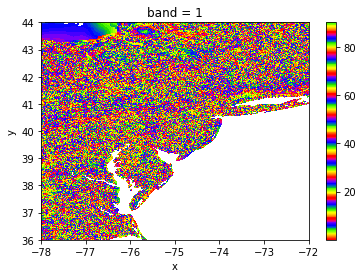

In [4]:
da_masked.plot(cmap='prism')

In [6]:
src=rasterio.open(tif)
src.show()

AttributeError: 'DatasetReader' object has no attribute 'show'

In [8]:
src.height

3846

In [9]:
src.width

2885

In [10]:
src.bounds

BoundingBox(left=-78.00085750968124, bottom=35.998921986074585, right=-71.99865901392728, top=44.00046632391505)

In [12]:
src.transform

Affine(0.00208048474722841, 0.0, -78.00085750968124,
       0.0, -0.00208048474722841, 44.00046632391505)

In [13]:
ary = src.read(1)

In [42]:
ary.shape

(3846, 2885)

In [14]:
ary

array([[        nan,         nan,         nan, ..., 19.80095083,
        18.82474219, 17.37462543],
       [        nan,         nan,         nan, ..., 19.91409471,
        18.90341556, 17.43545074],
       [        nan,         nan,         nan, ..., 19.95434666,
        18.44955388, 17.29252447],
       ...,
       [68.45430781, 68.59528687, 68.71712368, ...,         nan,
                nan,         nan],
       [68.1876152 , 68.17848265, 68.19649157, ...,         nan,
                nan,         nan],
       [67.61321173, 67.41280992, 67.32500885, ...,         nan,
                nan,         nan]])

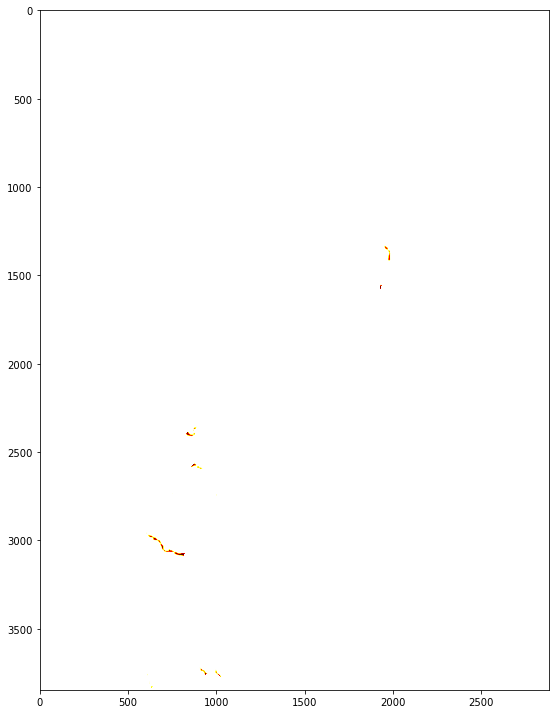

In [16]:
from matplotlib import pyplot
pyplot.figure(figsize=(17.5,12.5))
pyplot.imshow(ary, cmap='hot')
pyplot.show()

In [23]:
import numpy as np
arym = np.ma.masked_where(ary, ary<0.0)

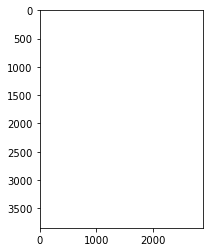

In [24]:
pyplot.imshow(arym, cmap='hot')
pyplot.show()

In [25]:
ary.min()

nan

In [26]:
ary.max()

nan

In [31]:
mary = np.nan_to_num(ary)

In [32]:
mary.min()

-3.5924780826709906e+40

In [33]:
mary.max()

90.18133736905148

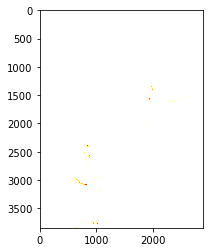

In [34]:
pyplot.imshow(mary, cmap='hot')
pyplot.show()

In [35]:
mary[(mary< 0)] = 0

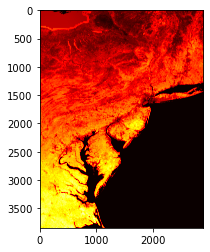

In [36]:
pyplot.imshow(mary, cmap='hot')
pyplot.show()

# references 

https://pythonhosted.org/rasterstats/

In [38]:
! rio info s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif


{"blockxsize": 512, "blockysize": 512, "bounds": [-78.00085750968124, 35.998921986074585, -71.99865901392728, 44.00046632391505], "colorinterp": ["gray"], "compress": "deflate", "count": 1, "crs": "EPSG:4326", "descriptions": ["etasw_"], "driver": "GTiff", "dtype": "float64", "height": 3846, "indexes": [1], "interleave": "band", "lnglat": [-74.99975826180426, 39.99969415499481], "mask_flags": [["nodata"]], "nodata": NaN, "res": [0.00208048474722841, 0.00208048474722841], "shape": [3846, 2885], "tiled": true, "transform": [0.00208048474722841, 0.0, -78.00085750968124, 0.0, -0.00208048474722841, 44.00046632391505, 0.0, 0.0, 1.0], "units": [null], "width": 2885}


In [39]:
! rio zonalstats -r s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif

Usage: rio [OPTIONS] COMMAND [ARGS]...
Try 'rio --help' for help.

Error: No such command 'zonalstats'.


In [40]:
! pip install --user rasterstats

In [41]:
#! rio zonalstats -r s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif

^C

Aborted!
